!conda install -c anaconda pydot

In [1]:
import pandas as pd 
import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

## 한글 시각화
path = '/Users/reejungkim/Downloads/맑은고딕/malgun.ttf' 
font_name = fm.FontProperties(fname=path).get_name()

import requests
from bs4 import BeautifulSoup

url = 'https://n.news.naver.com/mnews/article/022/0003772512?sid=101'

r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')
soup

In [2]:
content = '''
(서울=뉴스1) 송원영 기자 = 지난달 서울 아파트 매매량은 한 달 만에 역대 최저치를 새로 썼고, 미분양은 한 달 사이 27% 증가한 것으로 나타났다. 금리 인상과 집값 하락 우려로 주택 시장이 꽁꽁 얼어붙고 있다. 31일 국토교통부의 '9월 주택통계'에 따르면 올해 들어 9월까지 전국의 주택 매매량(누계)은 41만7794건으로 전년 동기 대비 49% 감소했다. 9월 한 달간 주택 거래량은 3만2403건으로 1년 전보다 60.3% 줄었다. 사진은 이날 서울 송파구 롯데월드타워 전망대 서울스카이에서 바라본 아파트 단지 모습. 2022.10.31/뉴스1 Copyright (C) 뉴스1. All rights reserved. 무단 전재 및 재배포 금지.

주택사업자들이 전망하는 미분양물량지수가 넉달만에 하락했다. 미분양물량이 줄어들 것으로 보는 응답자가 늘어났다는 뜻으로, 주택시장 연착륙 대책에 대한 기대감이 반영된 것으로 보인다.

10일 주택산업연구원이 주택사업자들을 대상으로 설문조사한 결과, 1월 아파트분양전망지수가 지난달 대비 6.3p 올라 58.7을 기록했다. 여전히 전국적으로 낮은 수준이지만 10월(37.1) 이후 지속적인 상승세다.

지난달 21일 '2023 경제정책방향'에서 주택시장 정상화를 위해 세제금융, 규제완화 등 종합계획을 발표한데 이어 이달 3일 국토교통부 업무보고에서 규제지역 전면 해제 등 주택시장 연착륙 대책에 대한 기대심리가 작용했다.

특히, 세종은 지난달(50) 대비 분양전망지수가 14.2p 급등해 64.2로 올라왔다. 세종은 오는 3월부터 분양권 전매제한 기간이 1년(비수도권 공공택지)으로 줄어든다.

강원(50.0→70.0), 경남(50.0→71.4)은 20p 이상 분양전망지수가 뛰어올랐다. 경남은 지역 제조업 생산의 증가세로 인한 지역 경기 회복이 반영된 것으로 보이며 강원은 강원도청사 이전 등 지역개발 이슈로 분양 전망이 크게 상승했다.

이 밖에 전남 18.7p(50.0→68.7), 경북 16.6p(50.0→66.6), 충북 14.8p(46.7→61.5), 충남 12.9p(47.1→60.0), 전북 12.6p(58.8→71.4)로 지방 대부분의 지역에서 전망지수가 크게 상승했다.

수도권만 50선 아래로 전망됐다. 서울의 분양전망지수는 지난달(47.2)보다 소폭 떨어져 43.9를 기록했고 수도권(45.3→43.9)도 소폭 하락했다. 공급 과잉 상태인 인천도 지난달(42.4) 대비 소폭 하락해 39.2에 그치며 전국 최저치를 기록했다. 경기만 2.5p(46.2→48.7) 상승 전망이 나왔다.

주택사업자들은 또 1월 분양가격 전망치를 81.2로 전월 대비 9.6p 하락할 것으로 내다봤다. 가파른 금리 인상에 따른 거래절벽 심화현상이 반영된 것으로 보인다. 그러나 공사비와 인건비 상승, 분양가상한제 적용 지역 대거 해제로 실제 분양가 하락폭은 제한적일 것으로 보인다.

한편, 1월 분양물량 전망지수는 70.1로 지난달 대비 1.9p 높아졌다. 반면 1월 미분양물량 전망지수는 129.9로 지난달 대비 5.9p 낮아졌다. 미분양물량 전망지수가 낮아진 것은 넉달만이다. 미분양물량이 줄어들 것으로 보는 응답자가 늘어났다는 뜻이다. 주택시장 연착륙대책에 대한 기대감이 반영된 것으로 보인다.

주택산업연구원 관계자는 "분양권 전매제한 기간 완화 및 해제, 중도금 대출규제 완화, 실거주 의무 폐지 등 규제완화 정책이 잇달아 발표되며 규제완화 적용 시기에 맞춰 사업자들이 분양일정을 조정하고 추후 분양 물량과 미분양 물량에 영향을 미칠 것"이라고 말했다.

한편 주택산업연구원의 개별 조사항목 지수는 주택사업자들의 '좋음' 응답비중에서 '나쁨' 응답비중을 빼고 100을 더해 산정한다.

'''

In [3]:
import re
cleaned_content = re.sub('[^,.?!\w\s]','', content)  # 정규표현식 사용
cleaned_content = cleaned_content.replace('연합뉴스', '').replace(' 송원영 기자', '')  # 추가로 더 제거

In [73]:
 from konlpy.tag import Kkma
 kkma = Kkma()

 NN_words = [] 

 kkma_pos = kkma.pos(cleaned_content)
 for word, pos in kkma_pos:
     if 'NN' in pos:
         NN_words.append(word)

In [74]:
customized_stopwords = ['것', '등', '탓', '바', '용', '년', '개', '당', '면', '말', '건', '전', '역']

unique_NN_words = set(NN_words)
for word in unique_NN_words:
    if word in customized_stopwords:
        while word in NN_words: NN_words.remove(word) 

In [76]:
print(NN_words)

['서울', '뉴스', '송원', '영', '기자', '지난달', '서울', '아파트', '매매', '량', '달', '만', '역대', '최저', '새', '미분양', '달', '사이', '증가', '금리', '인상', '집값', '하락', '우려', '주택', '시장', '일', '국토', '교통부', '월', '주택', '통계', '올해', '월', '전국', '주택', '매매', '량', '누계', '은', '전년', '동기', '대비', '감소', '월', '달', '간', '주택', '거래량', '사진', '이날', '서울', '송파구', '롯데', '월드', '타워', '전망대', '서울', '스카이', '아파트', '단지', '모습', '뉴스', '뉴스', '무단', '전재', '배포', '금지', '주택', '사업자', '전망', '미분양', '물량', '지수', '달', '만', '하락', '미분양', '물량', '응답자', '뜻', '주택', '시장', '연착륙', '대책', '기대감', '반영', '일', '주택', '산업', '연구원', '주택', '사업자', '대상', '설문', '조사', '결과', '월', '아파트', '분양', '전망', '지수', '지난달', '대비', '전국적', '수준', '월', '이후', '지속적', '상승세', '지난달', '일', '경제', '정책', '방향', '주택', '시장', '정상화', '세제', '금융', '규제', '완화', '종합', '계획', '발표', '데', '이달', '일', '국토', '교통부', '업무', '보고', '규제', '지역', '전면', '해제', '주택', '시장', '연착륙', '대책', '기대', '심리', '작용', '세종', '지난달', '대비', '분양', '전망', '지수', '급등', '세종', '월', '분양권', '전매', '제한', '기간', '수도권', '강원', '경남', '은', '이상', '분양', '전망', '지수', '경남', '지역',

In [7]:
from collections import Counter

c = Counter(NN_words)
print(c.most_common(20))   # 가장 빈번하게 나오는 20개의 단어 출력

# 가장 많이 나오는 단어 20개 저장
list_of_words = []
for word, count in c.most_common(20): 
    list_of_words.append(word)

[('주택', 15), ('전망', 13), ('분양', 11), ('지수', 10), ('월', 9), ('지난달', 8), ('물량', 8), ('미분양', 7), ('대비', 7), ('지역', 6), ('서울', 5), ('달', 5), ('하락', 5), ('시장', 5), ('사업자', 5), ('규제', 5), ('완화', 5), ('일', 4), ('반영', 4), ('뉴스', 3)]


In [8]:
sentences = cleaned_content.split('.\n') 
sentences1 = []
sentences2 = []
sentences3 = []
for sentence in sentences:
    sentences1.extend(sentence.strip().split('. '))
for sentence in sentences1:
    sentences2.extend(sentence.strip().split('!'))
for sentence in sentences2:
    sentences3.extend(sentence.strip().split('?'))
article_sentences = sentences3 

print(article_sentences) 

['서울뉴스1 송원영 기자  지난달 서울 아파트 매매량은 한 달 만에 역대 최저치를 새로 썼고, 미분양은 한 달 사이 27 증가한 것으로 나타났다', '금리 인상과 집값 하락 우려로 주택 시장이 꽁꽁 얼어붙고 있다', '31일 국토교통부의 9월 주택통계에 따르면 올해 들어 9월까지 전국의 주택 매매량누계은 41만7794건으로 전년 동기 대비 49 감소했다', '9월 한 달간 주택 거래량은 3만2403건으로 1년 전보다 60.3 줄었다', '사진은 이날 서울 송파구 롯데월드타워 전망대 서울스카이에서 바라본 아파트 단지 모습', '2022.10.31뉴스1 Copyright C 뉴스1', 'All rights reserved', '무단 전재 및 재배포 금지', '주택사업자들이 전망하는 미분양물량지수가 넉달만에 하락했다', '미분양물량이 줄어들 것으로 보는 응답자가 늘어났다는 뜻으로, 주택시장 연착륙 대책에 대한 기대감이 반영된 것으로 보인다', '10일 주택산업연구원이 주택사업자들을 대상으로 설문조사한 결과, 1월 아파트분양전망지수가 지난달 대비 6.3p 올라 58.7을 기록했다', '여전히 전국적으로 낮은 수준이지만 10월37.1 이후 지속적인 상승세다', '지난달 21일 2023 경제정책방향에서 주택시장 정상화를 위해 세제금융, 규제완화 등 종합계획을 발표한데 이어 이달 3일 국토교통부 업무보고에서 규제지역 전면 해제 등 주택시장 연착륙 대책에 대한 기대심리가 작용했다', '특히, 세종은 지난달50 대비 분양전망지수가 14.2p 급등해 64.2로 올라왔다', '세종은 오는 3월부터 분양권 전매제한 기간이 1년비수도권 공공택지으로 줄어든다', '강원50.070.0, 경남50.071.4은 20p 이상 분양전망지수가 뛰어올랐다', '경남은 지역 제조업 생산의 증가세로 인한 지역 경기 회복이 반영된 것으로 보이며 강원은 강원도청사 이전 등 지역개발 이슈로 분양 전망이 크게 상승했다', '이 밖에 전남 18.7p50.068.7, 경북 16.6p50.066.6, 충북 14

In [9]:
# 가장 많이 출현하는 20개의 명사 단어들에 대해서 네트워크 생성하기
import networkx as nx
   
G = nx.Graph()
G.add_nodes_from(list_of_words)   # node 생성 (가장 많았던 명사 단어 20개)

print(G.nodes()) # nodes
print(G.edges()) # edge, 즉 node 간의 관계는 아직 없는 상황

['주택', '전망', '분양', '지수', '월', '지난달', '물량', '미분양', '대비', '지역', '서울', '달', '하락', '시장', '사업자', '규제', '완화', '일', '반영', '뉴스']
[]


In [57]:
 import itertools

 for sentence in article_sentences:
        
     selected_words = []
     NN_words = [] 

     kkma_pos = kkma.pos(sentence)
     for word, pos in kkma_pos:  #break a sentence into words
         if 'NN' in pos: 
             NN_words.append(word) #words list 
     #print(NN_words)
        
     for word in NN_words:
         if word in list_of_words:   #common_words
             selected_words.append(word) 
     #print(selected_words)
     selected_words = set(selected_words)

     for pair in list(itertools.combinations(list(selected_words), 2)):  
         if pair in G.edges(): 
             weight = G[pair[0]][pair[1]]['weight']
             weight += 1
             G[pair[0]][pair[1]]['weight'] = weight    
         else:
             G.add_edge(pair[0], pair[1], weight=1 )
            
 # 생성된 edge 확인해보기
 print(nx.get_edge_attributes(G, 'weight'))

{('주택', '하락'): 6, ('주택', '시장'): 8, ('주택', '일'): 6, ('주택', '월'): 8, ('주택', '대비'): 6, ('주택', '달'): 4, ('주택', '사업자'): 10, ('주택', '미분양'): 6, ('주택', '물량'): 6, ('주택', '전망'): 6, ('주택', '지수'): 6, ('주택', '반영'): 4, ('주택', '분양'): 6, ('주택', '지난달'): 4, ('주택', '완화'): 4, ('주택', '지역'): 2, ('주택', '규제'): 4, ('전망', '사업자'): 6, ('전망', '미분양'): 6, ('전망', '물량'): 8, ('전망', '달'): 4, ('전망', '하락'): 6, ('전망', '지수'): 18, ('전망', '분양'): 14, ('전망', '월'): 8, ('전망', '지난달'): 10, ('전망', '대비'): 10, ('전망', '일'): 2, ('전망', '반영'): 2, ('전망', '지역'): 4, ('전망', '서울'): 2, ('분양', '사업자'): 6, ('분양', '월'): 6, ('분양', '지난달'): 8, ('분양', '대비'): 8, ('분양', '일'): 2, ('분양', '지수'): 10, ('분양', '반영'): 2, ('분양', '지역'): 4, ('분양', '서울'): 2, ('분양', '하락'): 4, ('분양', '물량'): 4, ('분양', '미분양'): 2, ('분양', '완화'): 2, ('분양', '규제'): 2, ('지수', '사업자'): 6, ('지수', '미분양'): 6, ('지수', '물량'): 8, ('지수', '달'): 4, ('지수', '하락'): 4, ('지수', '월'): 6, ('지수', '지난달'): 10, ('지수', '대비'): 8, ('지수', '일'): 2, ('지수', '지역'): 2, ('지수', '서울'): 2, ('월', '일'): 4, ('월', '대비'): 10, ('월', '

In [58]:
df_association = pd.DataFrame( nx.get_edge_attributes(G, 'weight'), index=[1] ).transpose().reset_index()
df_association.columns=['word', 'associated_word' , 'count']

In [60]:
df_association.head()

,word,associated_word,count
0,주택,하락,6
1,주택,시장,8
2,주택,일,6
3,주택,월,8
4,주택,대비,6


from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    #if 'gothic' in font.name:
    print(font.name, font.fname)

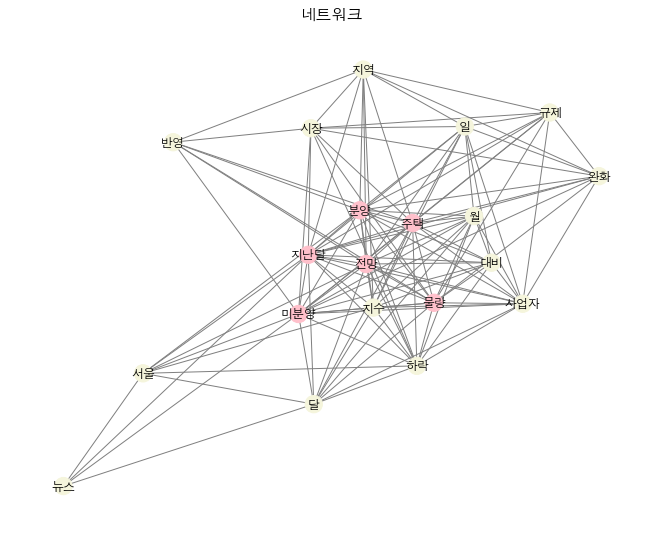

In [13]:
## 한글 시각화
# matplotlib 폰트설정
#plt.rc('font', family='/Users/reejungkim/Documents/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf') # For MacOS
#font_name = fm.FontProperties(fname='/Users/reejungkim/Documents/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf', size=18)

import matplotlib.font_manager as fm
from matplotlib import rc
#plt.rc('font', family=path ) 

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 13#

## 노드의 degree에 따라 color 다르게 설정하기
color_map = []
for node in G:
    if G.degree(node) >= 15:   # 중요한 노드 (degree가 15 이상)
        color_map.append('pink') 
    else: 
        color_map.append('beige')    

plt.figure(figsize=(9, 7))

pos = nx.spring_layout(G)#, k=3.5)  # spring layout 사용
fig = nx.draw(G, pos, node_color=color_map, edge_color='grey', font_family='AppleGothic', with_labels = True)

plt.title('네트워크')
plt.axis('off') # turn off axis 

plt.show()

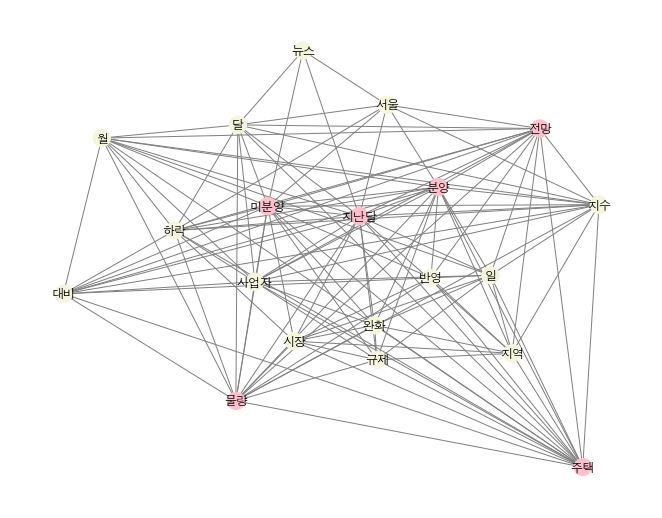

In [14]:
plt.figure(figsize=(9, 7))

pos = nx.kamada_kawai_layout(G) # nx.circular_layout(G)
nx.draw(G, pos, node_color=color_map, edge_color='grey', font_family='AppleGothic', with_labels = True)

plt.savefig('networkx.png', bbox_inches='tight')
plt.axis('off')
plt.show()

## 단순 언급 빈도 

In [56]:
pd.DataFrame(c.most_common(20)).set_index(0).sort_values(by=1, ascending=False).transpose()

,주택,전망,분양,지수,월,지난달,물량,미분양,대비,지역,사업자,완화,규제,서울,시장,하락,달,일,반영,뉴스
1,15,13,11,10,9,8,8,7,7,6,5,5,5,5,5,5,5,4,4,3


##  TF-IDF(Term Frequency-Inverse Document Frequency)

TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다. TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다.

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

corpus = NN_words #article_sentences

vect = CountVectorizer()
document_term_matrix = vect.fit_transform(corpus)       # 문서-단어 행렬 

tf = pd.DataFrame(document_term_matrix.toarray(), columns=vect.get_feature_names())  
                                             # TF (Term Frequency)
D = len(tf)
df = tf.astype(bool).sum(axis=0)
idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

# TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf = tf * idf                      
tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)

 

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [104]:
pd.DataFrame(idf).reset_index().sort_values(by=0, ascending =False).transpose()

,0,61,101,100,99,98,97,96,95,94,...,142,132,47,36,128,46,131,54,110,124
index,가격,산정,인건비,이후,이전,이슈,이상,이달,이날,의무,...,하락,지역,미분양,대비,지난달,물량,지수,분양,전망,주택
0,6.126936,6.126936,6.126936,6.126936,6.126936,6.126936,6.126936,6.126936,6.126936,6.126936,...,5.028323,4.874173,4.740641,4.740641,4.622858,4.622858,4.422188,4.335176,4.181026,4.047494


In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(corpus)
#pd.DataFrame(tfidfv.transform(corpus).toarray())
pd.DataFrame(tfidfv.vocabulary_, index=[0]).transpose().sort_values(by=0, ascending =False).transpose()

,회복,현상,해제,항목,한편,하락폭,하락,폐지,통계,타워,...,거주,거래량,거래,개별,개발,강원도,강원,감소,가상,가격
0,148,147,146,145,144,143,142,141,140,139,...,9,8,7,6,5,4,3,2,1,0


## Centrality

### Degree Centrality: tie가 얼마나 많은지의 정도
특정 node의 neighbor 수 / 최대로 가질 수 있는 neighbor 수 = degree / (n-1)
최대로 가질 수 있는 neighbor 수는 n-1. (self-loop 고려X)

In [40]:
# degree centrality
pd.DataFrame( nx.degree_centrality(G), index=[0]).transpose().sort_values(by=0, ascending=False ).transpose()

,지난달,주택,미분양,분양,물량,전망,지수,사업자,하락,월,일,대비,달,시장,지역,규제,완화,서울,반영,뉴스
0,0.947368,0.894737,0.894737,0.842105,0.789474,0.789474,0.736842,0.736842,0.684211,0.631579,0.631579,0.578947,0.578947,0.526316,0.526316,0.526316,0.526316,0.421053,0.368421,0.210526


### Betweenness Centrality: 얼마나 bridge 역할을 하는지의 정도

In [39]:
pd.DataFrame(  nx.betweenness_centrality(G), index=[0]).transpose().sort_values(by=0, ascending=False ).transpose()

,지난달,미분양,주택,분양,전망,물량,지수,달,사업자,일,하락,시장,지역,서울,규제,완화,월,반영,대비,뉴스
0,0.077228,0.071006,0.03749,0.037105,0.028453,0.027216,0.017579,0.015525,0.014198,0.013777,0.013501,0.010587,0.010004,0.00692,0.00441,0.00441,0.003922,0.002615,0.001713,0.0


### Closeness Centrality: 다른 node들과 얼마나 close하게 연결되어 있나
특정 node에서의 다른 node까지의 shortest path를 고려

In [38]:
pd.DataFrame( nx.closeness_centrality(G) , index=[0]).transpose().sort_values(by=0, ascending=False ).transpose()

,지난달,주택,미분양,분양,물량,전망,지수,사업자,하락,월,일,대비,달,시장,지역,규제,완화,서울,반영,뉴스
0,0.95,0.904762,0.904762,0.863636,0.826087,0.826087,0.791667,0.791667,0.76,0.730769,0.730769,0.703704,0.703704,0.678571,0.678571,0.678571,0.678571,0.633333,0.612903,0.558824


In [41]:
nx.degree(G, '미분양')


17

g = nx.complete_graph(4)
d = to_pydot(g)
d.set_dpi(600)
d.set_rankdir("LR")
Image(d.create_png(), width=600)